##  Amazon.com - Employee Access Challenge 
The goal is to predict whether access to a resource should be granted or not

https://www.kaggle.com/c/amazon-employee-access-challenge

* by: Adarsh Namala. 
* adarsh.namala@gmail.com

The data consists of real historical data collected from 2010 & 2011.  Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees. 

#####File Descriptions:

train.csv - The training set. Each row has the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval

test.csv - The test set for which predictions should be made.  Each row asks whether an employee having the listed characteristics should have access to the listed resource.

#####Column Descriptions:

* ACTION: ACTION is 1 if the resource was approved, 0 if the resource was not
* RESOURCE: An ID for each resource
* MGR_ID: The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time
* ROLE_ROLLUP_1: Company role grouping category id 1 (e.g. US Engineering)
* ROLE_ROLLUP_2: Company role grouping category id 2 (e.g. US Retail)
* ROLE_DEPTNAME: Company role department description (e.g. Retail)
* ROLE_TITLE: Company role business title description (e.g. Senior Engineering Retail Manager)
* ROLE_FAMILY_DESC: Company role family extended description (e.g. Retail Manager, Software Engineering)
* ROLE_FAMILY: Company role family description (e.g. Retail Manager)
* ROLE_CODE: Company role code; this code is unique to each role (e.g. Manager)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
import random

In [3]:
loc_dir = "C:\\Users\\206445860\\Documents\\Adarsh\\Kaggle\\Amazon\\data\\"
train_df = pd.read_csv(loc_dir + "train.csv")
test_df = pd.read_csv(loc_dir + "test.csv")

In [4]:
print "Columns in train set:\n%s\n\nColumns in test set:\n %s" %(train_df.columns,test_df.columns)

Columns in train set:
Index([u'ACTION', u'RESOURCE', u'MGR_ID', u'ROLE_ROLLUP_1', u'ROLE_ROLLUP_2',
       u'ROLE_DEPTNAME', u'ROLE_TITLE', u'ROLE_FAMILY_DESC', u'ROLE_FAMILY',
       u'ROLE_CODE'],
      dtype='object')

Columns in test set:
 Index([u'id', u'RESOURCE', u'MGR_ID', u'ROLE_ROLLUP_1', u'ROLE_ROLLUP_2',
       u'ROLE_DEPTNAME', u'ROLE_TITLE', u'ROLE_FAMILY_DESC', u'ROLE_FAMILY',
       u'ROLE_CODE'],
      dtype='object')


In [5]:
col_resource="RESOURCE"; col_mgr = "MGR_ID"; col_rollup1 = "ROLE_ROLLUP_1"; col_rollup2 = "ROLE_ROLLUP_2";
col_dept = "ROLE_DEPTNAME"; col_title = "ROLE_TITLE"; col_desc = "ROLE_FAMILY_DESC";col_family = "ROLE_FAMILY";
col_code = "ROLE_CODE";col_action='ACTION';

In [6]:
print"Different dtypes in the dataset"
print train_df.dtypes.unique()

print "All the columns in the train and test dataset are Int64"

Different dtypes in the dataset
[dtype('int64')]
All the columns in the train and test dataset are Int64


Check what perc of entries in the train set for the common columns exist in the test set

In [7]:
comm_cols = [col_resource,col_mgr,col_rollup1,col_rollup2,col_dept,col_title,col_desc,col_family,col_code]

In [7]:
print "The following are the # unique values in the train set:"
for xcol in train_df.columns:
    print "%s: %i" %(xcol,len(train_df[xcol].unique()))

The following are the # unique values in the train set:
ACTION: 2
RESOURCE: 7518
MGR_ID: 4243
ROLE_ROLLUP_1: 128
ROLE_ROLLUP_2: 177
ROLE_DEPTNAME: 449
ROLE_TITLE: 343
ROLE_FAMILY_DESC: 2358
ROLE_FAMILY: 67
ROLE_CODE: 343


In [8]:
# Check if there is a 1-1 mapping between ROLE_TITLE and ROLE_CODE
train_df[[col_title,col_code]].drop_duplicates().shape

(343, 2)

Since there are the same no.of combinations as are unique values in Role_Title and Role_Code. There is a 1-1 mapping

In [9]:
# check the number of success and failures in actions
train_df.ACTION.value_counts()*100/train_df.shape[0]

1    94.210992
0     5.789008
Name: ACTION, dtype: float64

In [10]:
# check for the most common value,#uniques and perc common between train and test in the columms
val_lst = []
for xcol in comm_cols:
    # get the most common value in the columns
    train_val = (train_df[xcol].value_counts()*100/float(train_df.shape[0]))
    test_val = (test_df[xcol].value_counts()*100)/float(test_df.shape[0])
    
    # Whats percentage of values in test_set exist in trainset
    train_values = train_df[xcol].unique().tolist()
    # check what unique values in test_df exist in train_df
    perc = test_df[[xcol]].drop_duplicates()
    perc = perc.isin(train_values).sum()/perc.shape[0]
    
    val_lst = val_lst + [(xcol,
                train_val.argmax(),np.round(train_val.max(),decimals=2),len(train_df[xcol].unique()),
                          test_val.argmax(),np.round(test_val.max(),decimals=2),len(test_df[xcol].unique()),
                          np.round(perc[0]*100,decimals=2))]

del train_val, test_val,train_values

pd.DataFrame(val_lst,columns=['variable','train_val','train_perc','train_unique',
                              'test_val','test_perc','test_unique','train_test_perc'])


,variable,train_val,train_perc,train_unique,test_val,test_perc,test_unique,train_test_perc
0,RESOURCE,4675,2.56,7518,4675,3.38,4971,100.00
1,MGR_ID,770,0.46,4243,770,0.47,4689,85.71
2,ROLE_ROLLUP_1,117961,65.33,128,117961,63.91,126,98.41
3,ROLE_ROLLUP_2,118300,13.50,177,118300,13.12,177,96.61
4,ROLE_DEPTNAME,117878,3.46,449,117878,3.84,466,94.21
5,ROLE_TITLE,118321,14.19,343,118321,12.62,351,94.87
6,ROLE_FAMILY_DESC,117906,21.04,2358,117906,18.84,2749,78.43
7,ROLE_FAMILY,290919,33.51,67,290919,30.35,68,98.53
8,ROLE_CODE,118322,14.19,343,118322,12.62,351,94.87


Check the distribution in the train columns. We set the ylim to 50 so as to see all the instances in the column

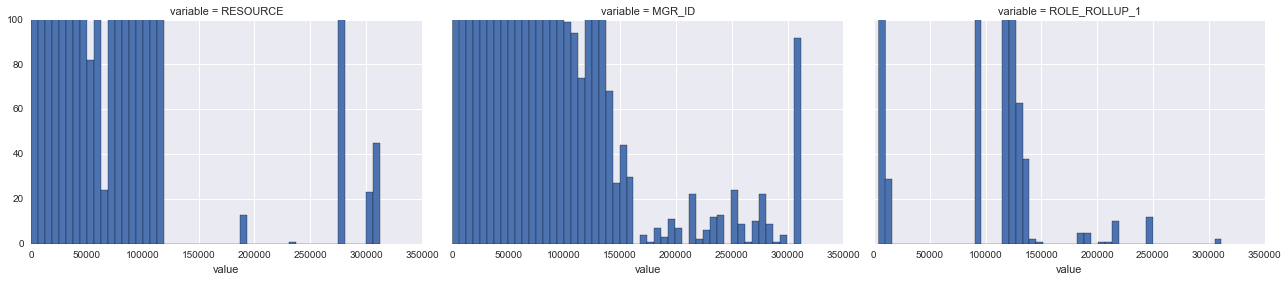

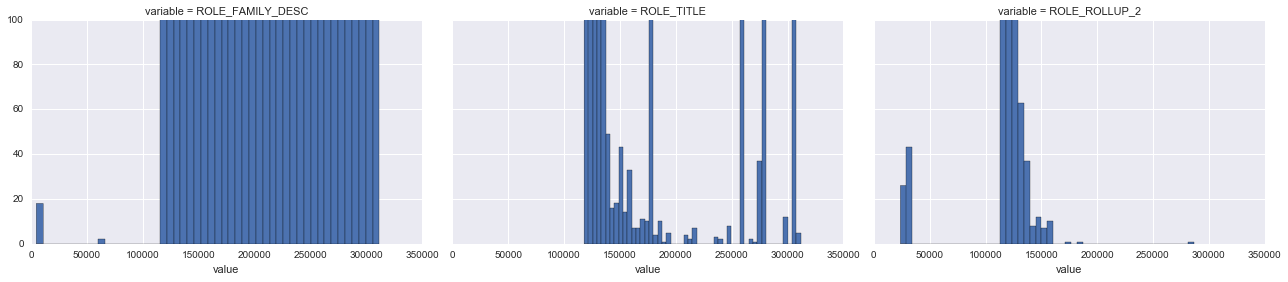

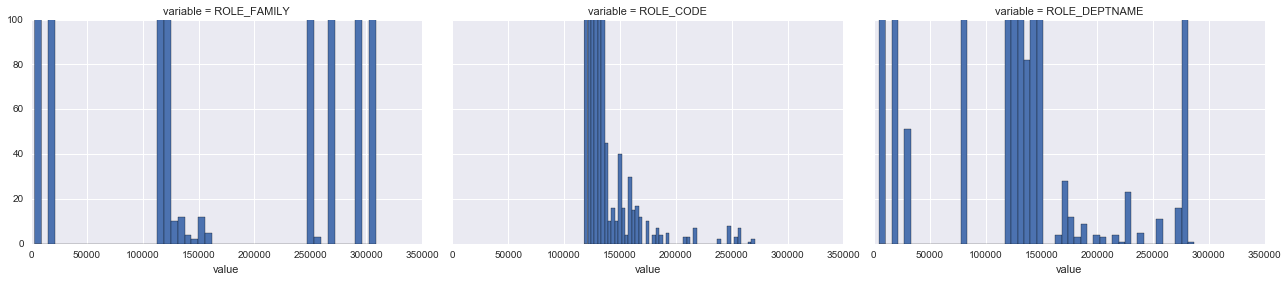

In [11]:
row1_cols = [col_resource,col_mgr,col_rollup1]
row2_cols = [col_desc,col_title,col_rollup2]
row3_cols = [col_family,col_code,col_dept]
x = plt.figure(figsize=(20,20))

for rowcols in (row1_cols,row2_cols,row3_cols):    
    temp_df = (train_df[rowcols].stack()).reset_index()
    temp_df.columns = ['idx','variable','value']
    g = sns.FacetGrid(temp_df,col='variable',sharex=True,size=4,aspect=1.5,ylim=[0,100])
    g = g.map(plt.hist,'value',bins=50)

del x,temp_df

In [49]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
comm_cols =[col_rollup1,col_rollup2,col_dept,col_title,col_desc,col_family]
pca2 = pca2.fit_transform(train_df[comm_cols])
temp_df = pd.DataFrame(pca2,columns=['pca1','pca2'])
temp_df['action'] = train_df[col_action]
temp_df.columns

Index([u'pca1', u'pca2', u'action'], dtype='object')

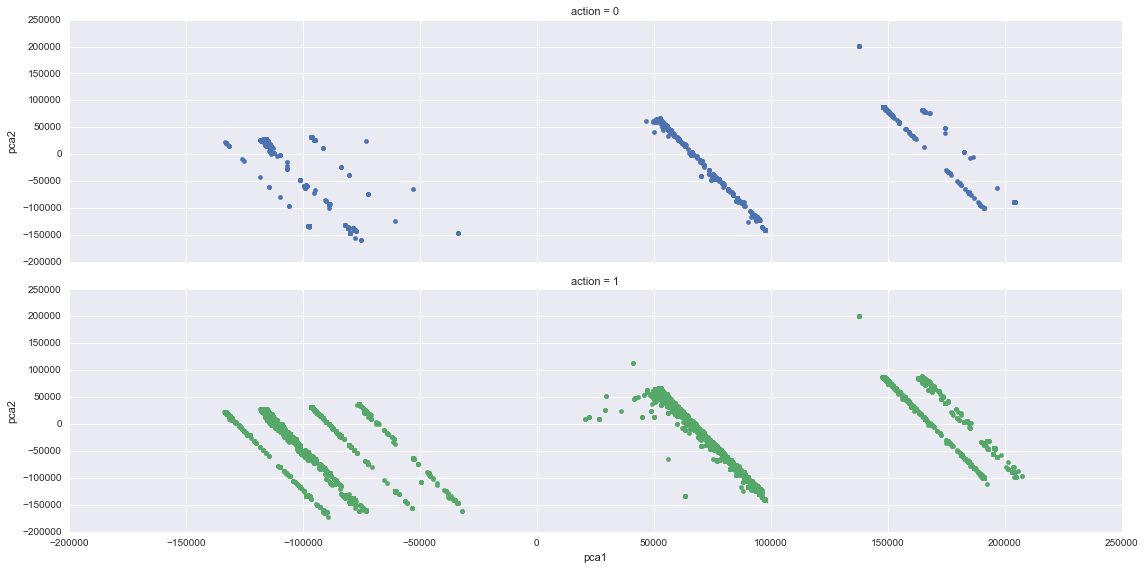

In [50]:
g = sns.FacetGrid(temp_df,row='action',hue='action',aspect=4,size=4)
g.map(plt.scatter,'pca1','pca2')

In [31]:
# function to find the probability of success for the given column combinations.
def perc_success(df,cols,col_name,test_df,del_temp=True,del_cols=''):
    """
    Function calculates the probability of acess based on the given column combinations. Then merge the probability to 
    the test set based on the column combination values.
    """
    test_df_temp = test_df.copy()
    print " Finding the probability of success for the following column combinations:\n%s" %cols
    temp_df = df.copy()
    
    temp_col = 'temp_' + col_name
    temp_df[temp_col] = temp_df[cols].astype(str).apply(lambda x:'_'.join(x),axis=1)
    per_val = temp_df.groupby(temp_col)[col_action].value_counts().unstack().apply(lambda x:x/sum(x),axis=1)[1].reset_index()
    
    # rename the column name to the col_name value
    per_val.rename(columns={1:col_name,'index':temp_col},inplace=True)
    
    #merge the data on the temp_col if the merge does not add duplicate rows
    if temp_df.merge(per_val,on=temp_col,how='left').shape[0] == temp_df.shape[0]:
        temp_df = temp_df.merge(per_val,on=temp_col,how='left')
    else:
        raise ValueError("The merge introduces duplicate values. Check")
    
    # create the same feature for the test set
    test_df_temp[temp_col] = test_df_temp[cols].astype(str).apply(lambda x:'_'.join(x),axis=1)
    
    #merge the feature to the test_set
    test_df_temp2 = test_df_temp.merge(temp_df[[temp_col,col_name]].drop_duplicates(),on=temp_col,how='left').fillna(0)
    if test_df_temp2.shape[0] != test_df_temp.shape[0]:
        raise ValueError("Merge error")
    
    # delete the columns
    if len(del_cols) >0:
        temp_df = temp_df.drop(del_cols,axis=1)
        test_df_temp2 = test_df_temp2.drop(del_cols,axis=1)
    
     
    if del_temp:
        del temp_df[temp_col]
        del test_df_temp2[temp_col]
 
    # create dummy values for all columns except the feat created
    dummy_cols = [x for x in temp_df.columns if x not in [col_name,col_action,col_code,col_mgr,col_resource]]
    temp_df = getdummies(temp_df,dummy_cols)
    
    return temp_df,test_df_temp2    

In [34]:
def getdummies(df,cols):
    """
    Function to create dummies for the given columns
    """
    dummy_df = pd.DataFrame()
    for xcol in cols:
        print "Creating dummy for: %s" %xcol
        tempdf = pd.get_dummies(df[xcol],sparse=True)
        # rename the columns to differentiate between dummies from different columns
        tempdf.columns = [xcol + str(x) for x in tempdf.columns]
        dummy_df = pd.concat([dummy_df,tempdf])
    
    # delete the cols from df and concat the dummy_df
    df = df.drop(cols,axis=1)
    # convert df to sparse dataset
    df = df.to_sparse()
    df =pd.concat([df,dummy_df])
    
    print "completed creating dummies"
    
    return df

In [35]:
comb_cols = [col_rollup1,col_rollup2]
tempx,tempy = perc_success(train_df,comb_cols,'feat1',test_df,del_cols=comb_cols)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_ROLLUP_2']
Creating dummy for: ROLE_DEPTNAME
Creating dummy for: ROLE_TITLE
Creating dummy for: ROLE_FAMILY_DESC
Creating dummy for: ROLE_FAMILY
completed creating dummies


In [13]:
def perc_comm(comm_cols):
    """
    Function which identifies the percentage of unique column combination values of the train data that also exist in the test 
    data
    """
    df_train = train_df[comm_cols].drop_duplicates().astype(str).apply(lambda x:'_'.join(x),axis=1)
    df_test = test_df[comm_cols].astype(str).apply(lambda x:'_'.join(x),axis=1)
    comm_value = df_test.isin(df_train).sum()*100/float(df_test.shape[0])
    print "For the %s columns, %0.2f entries in testset also exist in the train_set" %(comm_cols,comm_value)    

In [15]:
perc_comm([col_rollup1,col_family])
perc_comm([col_rollup1,col_desc])
perc_comm([col_rollup1,col_title])

For the ['ROLE_ROLLUP_1', 'ROLE_FAMILY'] columns, 99.65 entries in testset also exist in the train_set
For the ['ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC'] columns, 96.78 entries in testset also exist in the train_set
For the ['ROLE_ROLLUP_1', 'ROLE_TITLE'] columns, 98.96 entries in testset also exist in the train_set


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score

In [23]:
def run_algo(alg,temp_train_df,getX_test=False):
    """
    Function to split the training data into train and test set, fir the alogrithm to the data and get the prediction.
    
    """
    
#     if len(del_cols) > 0:
#         #drop the reuired columns
#         temp_train_df = temp_train_df.drop(del_cols,axis=1)
        
    # fill the null values with 0
    temp_train_df = temp_train_df.fillna(0)
    
    # split the temp_train_df into train and test sets
    #set the random_state so that all the algos are tested on the same dataset
    #set the seed
    random.seed(1985)
    X_train,X_test,y_train,y_test = train_test_split(temp_train_df.iloc[:,1:],temp_train_df[col_action],test_size=0.3,
                                                 stratify=temp_train_df[col_action],random_state=156)
    
    print "X_test index: %i" %(sum(X_test.index))
    
    # fit the model 
    alg = alg.fit(X_train,y_train)
    y_predict = pd.DataFrame(alg.predict(X_test),columns=['predicted'])
    y_predict.index = X_test.index

        
    print "Feature importance:\n%s" %(pd.DataFrame(zip(X_train.columns,np.round(alg.feature_importances_,3)),columns=['name',
                                                                                                                     'val']))
    print "The area under the curve score for the test set:%0.3f" %(roc_auc_score(y_test,y_predict))
    
    #concat the X_test values for analysis
    if getX_test:
        y_predict = pd.concat([X_test,y_predict],axis=1)
    
    
#     # get the score of the test set
#     score = alg.score(X_test,y_test)
#     print "The score on the test set is %f" %(score)

    return alg,y_predict

In [45]:
def run_random_forest(col_combinations):
    """
    Function that runs random forest for different combination features and gets the average prediction of the different 
    combinations
    """
    predict_df = pd.DataFrame()
    y_predict_df = pd.DataFrame()
    
    for i,xcombo in enumerate(col_combinations):
        xcombo = np.array(xcombo).tolist()
        if isinstance(xcombo,np.str):
            xcombo = [xcombo]  
        # get the feature based on the combination
        delcols= [col_resource,col_code,col_mgr] + xcombo
        
        temp_train_df,temp_test_df = perc_success(train_df,xcombo,'feat',test_df,del_temp=True,del_cols=delcols)
#         print temp_train_df.columns,temp_test_df.columns
        alg1 = RandomForestClassifier(class_weight={0:6,1:1},n_estimators=300,min_samples_leaf=3)
        get_x_test = False
        alg1,y_pred = run_algo(alg1,temp_train_df,get_x_test)
        # add the feat values 
        y_pred['feat'] = temp_train_df.loc[y_pred.index,'feat']
        y_pred.columns = [x +'_' + str(i) for x in y_pred.columns]
        
        # prediction for test_df
        predict1 = pd.DataFrame(alg1.predict(temp_test_df.iloc[:,1:]),columns=['alg_' +str(i)])
        # concat to main predict_df. concat on column
        predict_df = pd.concat([predict_df,predict1],axis=1)
        y_predict_df = pd.concat([y_predict_df,y_pred],axis=1)    
    
    # get the final prediction based on popular vote.
    predict_df[col_action] = (predict_df.mean(axis=1)).round()
    # merge the id columns
    predict_df['id'] = test_df['id']
    
    output_df = predict_df[['id',col_action]]
    
    # compute the ROC curve value for the combined prediction
    y_true = train_df.loc[y_predict_df.index,col_action]
    pred_cols = [x for x in y_predict_df.columns if 'predicted' in x]
    y_predict_df['final'] = (y_predict_df[pred_cols].mean(axis=1)).round()
    print "\nThe AUC for the combiend prediction:%0.3f" %(roc_auc_score(y_true,y_predict_df['final']))
    
    # concat the y_true value 
    y_predict_df['actual'] = train_df.loc[y_predict_df.index,col_action]
    y_predict_df['false_pos'] = (y_predict_df.final ==1) & (y_predict_df.actual ==0)
    y_predict_df['false_neg'] = (y_predict_df.final ==0) & (y_predict_df.actual ==1)
    
    print y_predict_df[['false_pos','false_neg']].sum()
    
    return output_df,y_predict_df

In [46]:
combos = [(col_title,col_dept),(col_rollup1,col_dept,col_desc),(col_desc,col_dept)]
# combos2 =[(col_rollup1,col_desc,col_dept,col_title)]
temp1,temp2 = run_random_forest(combos)
temp3 = pd.concat([train_df.loc[temp2.index,:],temp2],axis=1)

 Finding the probability of success for the following column combinations:
['ROLE_TITLE', 'ROLE_DEPTNAME']
X_test index: 161776191
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.065
1     ROLE_ROLLUP_2  0.096
2  ROLE_FAMILY_DESC  0.140
3       ROLE_FAMILY  0.061
4              feat  0.637
The area under the curve score for the test set:0.758
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_2  0.113
1     ROLE_TITLE  0.095
2    ROLE_FAMILY  0.061
3           feat  0.731
The area under the curve score for the test set:0.787
 Finding the probability of success for the following column combinations:
['ROLE_FAMILY_DESC', 'ROLE_DEPTNAME']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_1  0.064
1  ROLE_ROLLUP_2  0.095
2     ROLE_TITLE  0.104
3    ROLE_FAMILY  0.064
4       

In [47]:
temp1.to_csv(loc_dir + 'test7.csv',index=False)

## MISC

In [ ]:
n_samples / (n_classes * np.bincount(y))

In [43]:
float(train_df.shape[0])/(2* np.bincount(train_df.ACTION))

array([ 8.63705851,  0.53072363])

In [40]:
train_df.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [44]:
train_df.shape[0]/(2*30872.0),train_df.shape[0]/(2*1897.0)

(0.530723633065561, 8.637058513442277)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001968B3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002247F860>]], dtype=object)

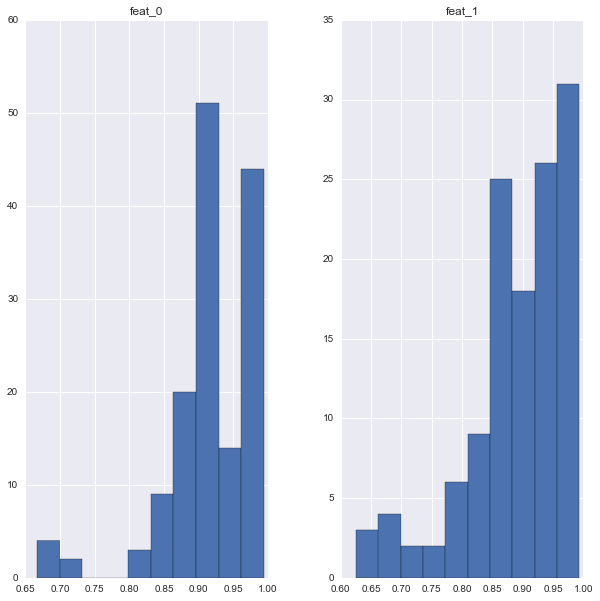

In [217]:
feat_cols = [x for x in temp3.columns if 'feat_' in x]
temp3[temp3.false_pos][feat_cols].hist(figsize=(10,10))

In [211]:
combos = [(col_title),(col_rollup1,col_dept,col_desc)]
combos2 =[(col_rollup1,col_desc,col_dept,col_title)]
temp1,temp2 = run_random_forest(combos)
temp3 = pd.concat([train_df.loc[temp2.index,:],temp2],axis=1)

 Finding the probability of success for the following column combinations:
['ROLE_TITLE']
X_test index: 161776191
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.079
1     ROLE_ROLLUP_2  0.155
2     ROLE_DEPTNAME  0.251
3  ROLE_FAMILY_DESC  0.184
4       ROLE_FAMILY  0.076
5              feat  0.255
The area under the curve score for the test set:0.752
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_2  0.121
1     ROLE_TITLE  0.097
2    ROLE_FAMILY  0.069
3           feat  0.714
The area under the curve score for the test set:0.800
['predicted_0', 'predicted_1']

The AUC for the combiend prediction:0.802
false_pos     152
false_neg    1198
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015E88C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000184F76A0>]], dtype=object)

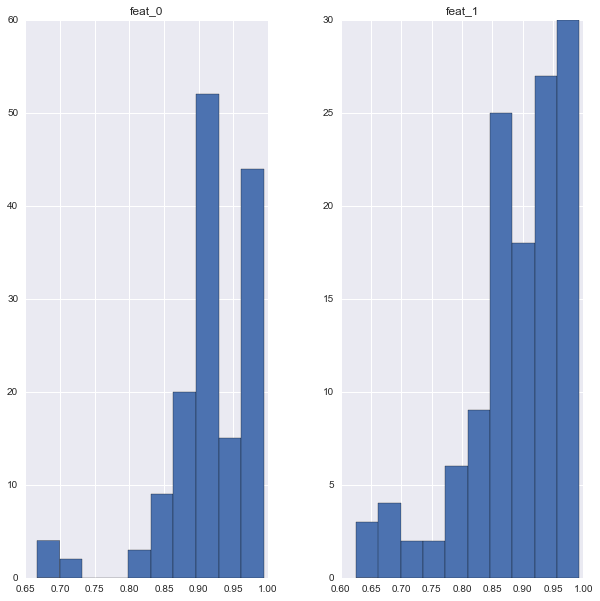

In [212]:
feat_cols = [x for x in temp3.columns if 'feat_' in x]
temp3[temp3.false_pos][feat_cols].hist(figsize=(10,10))

In [133]:
combos = [(col_rollup1,col_dept,col_desc),(col_title,col_rollup2),(col_rollup1,col_desc,col_rollup2),(col_rollup1,col_desc),]
#           (col_title,col_family),(col_title,col_desc)]

combos2 =[(col_rollup1,col_desc,col_dept,col_title)]
temp1,temp2 = run_random_forest(combos)
temp3 = pd.concat([train_df.loc[temp2.index,:],temp2],axis=1)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_2  0.119
1     ROLE_TITLE  0.097
2    ROLE_FAMILY  0.068
3           feat  0.717
The area under the curve score for the test set:0.799
 Finding the probability of success for the following column combinations:
['ROLE_TITLE', 'ROLE_ROLLUP_2']
X_test index: 161776191
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.056
1     ROLE_DEPTNAME  0.194
2  ROLE_FAMILY_DESC  0.130
3       ROLE_FAMILY  0.062
4              feat  0.557
The area under the curve score for the test set:0.772
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC', 'ROLE_ROLLUP_2']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_DEPTNAME  0.206
1     ROLE_TITLE  0.098
2    ROLE_FAMILY  0.064
3           fea

In [136]:
temp1.to_csv(loc_dir + 'test5.csv',index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C786B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017F10B70>]], dtype=object)

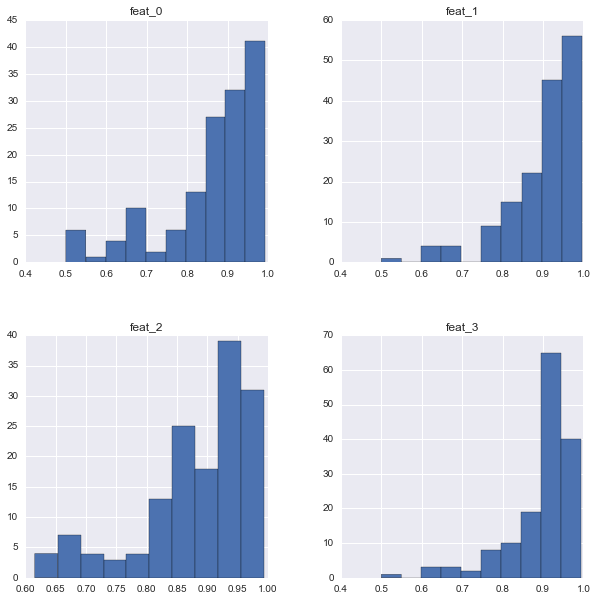

In [134]:
feat_cols = [x for x in temp3.columns if 'feat_' in x]
temp3[temp3.false_pos][feat_cols].hist(figsize=(10,10))

In [127]:
combos = [(col_rollup1,col_dept,col_desc),(col_title,col_rollup2),(col_rollup1,col_dept),(col_rollup1,col_desc)]
#           (col_title,col_family),(col_title,col_desc)]

combos2 =[(col_rollup1,col_desc,col_dept,col_title)]
temp1,temp2 = run_random_forest(combos)
temp3 = pd.concat([train_df.loc[temp2.index,:],temp2],axis=1)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_2  0.120
1     ROLE_TITLE  0.097
2    ROLE_FAMILY  0.068
3           feat  0.715
The area under the curve score for the test set:0.798
 Finding the probability of success for the following column combinations:
['ROLE_TITLE', 'ROLE_ROLLUP_2']
X_test index: 161776191
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.053
1     ROLE_DEPTNAME  0.192
2  ROLE_FAMILY_DESC  0.132
3       ROLE_FAMILY  0.061
4              feat  0.563
The area under the curve score for the test set:0.771
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME']
X_test index: 161776191
Feature importance:
               name    val
0     ROLE_ROLLUP_2  0.121
1        ROLE_TITLE  0.117
2  ROLE_FAMILY_DESC  0.158
3       ROLE_FAMILY  0.

In [117]:
temp3[(temp3.feat_0 < 0.5)][['false_pos','false_neg']].sum()

false_pos     2
false_neg    58
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000204311D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000241AA860>]], dtype=object)

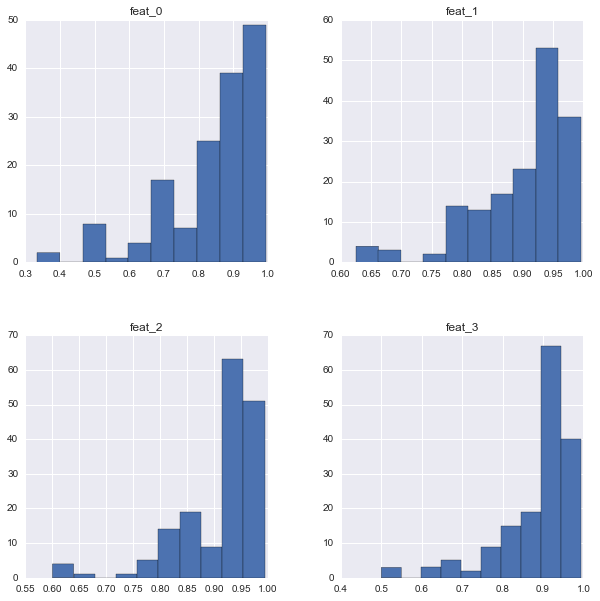

In [130]:
feat_cols = [x for x in temp3.columns if 'feat_' in x]
temp3[temp3.false_pos][feat_cols].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EC84DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002D539978>]], dtype=object)

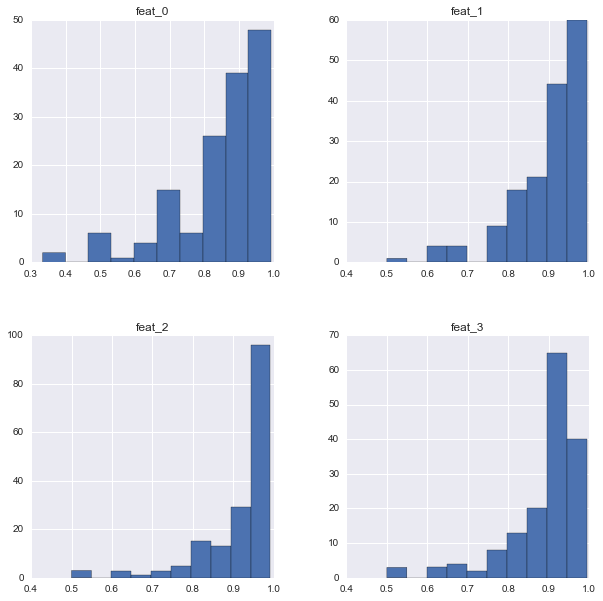

In [128]:
feat_cols = [x for x in temp3.columns if 'feat_' in x]
temp3[temp3.false_pos][feat_cols].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000112419B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5836D8>]], dtype=object)

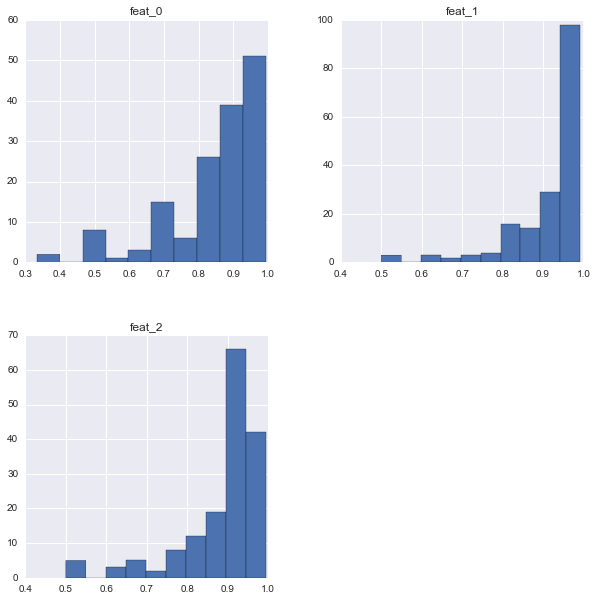

In [122]:
feat_cols = [x for x in temp3.columns if 'feat_' in x]
temp3[temp3.false_pos][feat_cols].hist(figsize=(10,10))

In [124]:
temp3[temp3.false_pos]

(175, 20)

In [75]:
temp3[temp3.false_pos].apply(lambda x:len(x.unique()))

ACTION                1
RESOURCE            145
MGR_ID              161
ROLE_ROLLUP_1        37
ROLE_ROLLUP_2        54
ROLE_DEPTNAME       103
ROLE_TITLE           71
ROLE_FAMILY_DESC     99
ROLE_FAMILY          29
ROLE_CODE            71
predicted_0           2
predicted_1           2
predicted_2           2
final                 1
actual                1
false_pos             1
false_neg             1
dtype: int64

In [80]:
temp3[(temp3.false_pos) & (temp3[col_rollup1] == 117961)].apply(lambda x:len(x.unique()))

ACTION                1
RESOURCE             99
MGR_ID              103
ROLE_ROLLUP_1         1
ROLE_ROLLUP_2        12
ROLE_DEPTNAME        79
ROLE_TITLE           48
ROLE_FAMILY_DESC     60
ROLE_FAMILY          24
ROLE_CODE            48
predicted_0           2
predicted_1           2
predicted_2           2
final                 1
actual                1
false_pos             1
false_neg             1
dtype: int64

In [93]:
temp_combo,y  = perc_success(train_df,[col_rollup1,col_family],'feat1',test_df,del_temp=False)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_FAMILY']


In [104]:
temp_combo[temp_combo.feat1 < 0.8]

(1163, 12)

In [99]:
temp_combo[(temp_combo.temp_feat1 == '117961_290919')]

array([ 0.94297782])

In [87]:
temp_bool = (temp3[col_family] == 290919) & (temp3.false_pos) &(temp3[col_rollup1] ==117961)

In [89]:
temp3[temp_bool].apply(lambda x:len(x.unique()))

ACTION               1
RESOURCE            53
MGR_ID              49
ROLE_ROLLUP_1        1
ROLE_ROLLUP_2       10
ROLE_DEPTNAME       39
ROLE_TITLE           6
ROLE_FAMILY_DESC     9
ROLE_FAMILY          1
ROLE_CODE            6
predicted_0          2
predicted_1          2
predicted_2          1
final                1
actual               1
false_pos            1
false_neg            1
dtype: int64

In [43]:
combos = [(col_rollup1,col_desc),(col_rollup1,col_dept),(col_title,col_desc)]
combos2 =[(col_rollup1,col_desc,col_dept,col_title)]
temp1,temp2 = run_random_forest(combos)
temp3 = pd.concat([train_df.loc[temp2.index,:],temp2],axis=1)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_2  0.140
1  ROLE_DEPTNAME  0.210
2     ROLE_TITLE  0.104
3    ROLE_FAMILY  0.068
4          feat1  0.478
The area under the curve score for the test set:0.781
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME']
X_test index: 161776191
Feature importance:
               name    val
0     ROLE_ROLLUP_2  0.122
1        ROLE_TITLE  0.119
2  ROLE_FAMILY_DESC  0.157
3       ROLE_FAMILY  0.072
4             feat1  0.530
The area under the curve score for the test set:0.772
 Finding the probability of success for the following column combinations:
['ROLE_TITLE', 'ROLE_FAMILY_DESC']
X_test index: 161776191
Feature importance:
            name    val
0  ROLE_ROLLUP_1  0.070
1  ROLE_ROLLUP_2  0.126
2  ROLE_DEPTNAME  0.211
3    ROLE_FAMILY  0.075
4

In [52]:
temp3[temp3.false_neg].apply(lambda x:len(x.unique()))

ACTION                1
RESOURCE            693
MGR_ID              523
ROLE_ROLLUP_1        56
ROLE_ROLLUP_2        76
ROLE_DEPTNAME       167
ROLE_TITLE           98
ROLE_FAMILY_DESC    176
ROLE_FAMILY          38
ROLE_CODE            98
predicted_0           2
predicted_1           2
predicted_2           2
final                 1
actual                1
false_pos             1
false_neg             1
dtype: int64

In [58]:
train_df[train_df[col_family]==290919][col_action].value_counts()

1    10347
0      633
Name: ACTION, dtype: int64

In [55]:
temp3[temp3.false_neg][col_family].value_counts()

290919    438
19721     164
292795     75
117887     45
118398     39
118424     33
308574     27
270488     23
4673       21
118960     20
118331     18
118638     18
118643     16
118453     15
119095     11
118474     10
19793       7
118131      6
118205      6
118363      6
118504      6
120518      5
118295      4
119184      4
119221      4
249618      3
118762      3
121620      2
120134      2
118667      2
118704      2
119788      1
118347      1
121916      1
118467      1
118612      1
119006      1
119695      1
Name: ROLE_FAMILY, dtype: int64

In [50]:
temp3.shape, temp2.shape

((9831, 17), (9831, 7))

In [107]:
temp2.sum()

predicted_0    8387.0
predicted_1    8431.0
predicted_2    8376.0
final          8406.0
actual         9262.0
false_pos       190.0
false_neg      1046.0
dtype: float64

In [84]:
combos = [(col_rollup1,col_desc),(col_rollup1,col_dept),(col_title,col_desc)]
combos2 =[(col_rollup1,col_desc,col_dept,col_title)]
temp1,temp2 = run_random_forest(combos)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC']
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.050
1     ROLE_ROLLUP_2  0.111
2     ROLE_DEPTNAME  0.198
3        ROLE_TITLE  0.095
4  ROLE_FAMILY_DESC  0.080
5       ROLE_FAMILY  0.057
6             feat1  0.409
The area under the curve score for the test set:0.784
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME']
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.053
1     ROLE_ROLLUP_2  0.086
2     ROLE_DEPTNAME  0.108
3        ROLE_TITLE  0.116
4  ROLE_FAMILY_DESC  0.148
5       ROLE_FAMILY  0.067
6             feat1  0.421
The area under the curve score for the test set:0.762
 Finding the probability of success for the following column combinations:
['ROLE_TITLE', 'ROLE_FAMILY_DESC']
Feature importance:
               name    val
0     ROLE_ROLLUP_1  0.063
1     ROLE_RO

In [25]:
temp1.to_csv(loc_dir + 'output6.csv',index=False)

In [182]:
train_df.columns

Index([u'ACTION', u'RESOURCE', u'MGR_ID', u'ROLE_ROLLUP_1', u'ROLE_ROLLUP_2',
       u'ROLE_DEPTNAME', u'ROLE_TITLE', u'ROLE_FAMILY_DESC', u'ROLE_FAMILY',
       u'ROLE_CODE'],
      dtype='object')

In [183]:
comm_col1 = [col_family]
comm_col2 = [col_rollup1,col_desc]
comm_col3 = [col_rollup1,col_title]


# perc_comm(comm_col1)
train_df1,test_df1 = perc_success(train_df,comm_col1,'feat1',test_df,del_temp=True,del_cols=delcols)
train_df2,test_df2 = perc_success(train_df,comm_col2,'feat2',test_df,True,del_cols=delcols)
train_df3,test_df3 = perc_success(train_df,comm_col3,'feat3',test_df,True,del_cols=delcols)

 Finding the probability of success for the following column combinations:
['ROLE_FAMILY']
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC']
 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_TITLE']


In [ ]:
len((set(train_df1[train_df1.feat1.isnull()].index).intersection(set(train_df2[train_df2.feat2.isnull()].index))).intersection(set(train_df3[train_df3.feat3.isnull()].index)))

In [214]:
nestimators = 100
minleaf=3

In [215]:
alg1 = RandomForestClassifier(class_weight='balanced',n_estimators=nestimators,min_samples_leaf=minleaf)
alg1 = run_algo(alg1,train_df1)

The area under the curve score for the test set:0.766


In [211]:
train_df1.columns

Index([u'ACTION', u'ROLE_ROLLUP_1', u'ROLE_ROLLUP_2', u'ROLE_DEPTNAME',
       u'ROLE_TITLE', u'ROLE_FAMILY_DESC', u'ROLE_FAMILY', u'feat1'],
      dtype='object')

In [216]:
alg2 = RandomForestClassifier(class_weight='balanced',n_estimators=nestimators,min_samples_leaf=minleaf)
alg2 = run_algo(alg2,train_df2)

The area under the curve score for the test set:0.799


In [217]:
alg3 = RandomForestClassifier(class_weight='balanced',n_estimators=nestimators,min_samples_leaf=minleaf)
alg3 = run_algo(alg3,train_df3)

The area under the curve score for the test set:0.773


In [218]:
train_df1.shape, test_df1.shape

((32769, 8), (58921, 8))

In [223]:
predict1 = alg1.predict(test_df1.iloc[:,1:])
predict2 = alg2.predict(test_df2.iloc[:,1:])
predict3 = alg3.predict(test_df3.iloc[:,1:])

In [224]:
alg1

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [225]:
predict_df = pd.DataFrame(zip(predict1,predict2,predict3),columns=['alg1','alg2','alg3'])

In [226]:
predict_df[col_action] = predict_df.mean(axis=1).round()

In [227]:
# train_df.iloc[:,1:].corr()

In [228]:
zip(train_df1.columns.tolist()[1:],alg1.feature_importances_)

[('ROLE_ROLLUP_1', 0.08554169340948968),
 ('ROLE_ROLLUP_2', 0.16583449467889155),
 ('ROLE_DEPTNAME', 0.25298718124239755),
 ('ROLE_TITLE', 0.13299507657574772),
 ('ROLE_FAMILY_DESC', 0.19781636434961744),
 ('ROLE_FAMILY', 0.06056583269617781),
 ('feat1', 0.10425935704767804)]

In [229]:
zip(train_df2.columns.tolist()[1:],alg2.feature_importances_)

[('ROLE_ROLLUP_1', 0.050725061456988234),
 ('ROLE_ROLLUP_2', 0.11630537187992367),
 ('ROLE_DEPTNAME', 0.19732610265005557),
 ('ROLE_TITLE', 0.092600895727295324),
 ('ROLE_FAMILY_DESC', 0.084662217637926626),
 ('ROLE_FAMILY', 0.060541966374448641),
 ('feat2', 0.39783838427336188)]

In [230]:
zip(train_df3.columns.tolist()[1:],alg3.feature_importances_)

[('ROLE_ROLLUP_1', 0.047018813994775484),
 ('ROLE_ROLLUP_2', 0.1231160075633416),
 ('ROLE_DEPTNAME', 0.22711215623564138),
 ('ROLE_TITLE', 0.070978793430198819),
 ('ROLE_FAMILY_DESC', 0.15156497010142306),
 ('ROLE_FAMILY', 0.063042345931146396),
 ('feat3', 0.31716691274347314)]

In [231]:
predict_df['id'] = test_df.id

In [232]:
output_df = predict_df[['id',col_action]]

In [234]:
output_df.to_csv(loc_dir +'output4.csv',index=False)

## Logistic regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [138]:
drop_cols = [col_resource,col_mgr,col_code]
train_df1 = train_df.drop(drop_cols,axis=1)
test_df1 = test_df.drop(drop_cols,axis=1)

In [139]:
comm_cols = [col_rollup1,col_rollup2,col_dept,col_title,col_desc,col_family]

In [140]:
def get_dummies(temp_df,cols):
    dummy_df = pd.DataFrame()

    for xcol in cols:
        print "for: %s" %xcol
        temp_df1 = pd.get_dummies(temp_df[xcol])
        temp_df1.columns = [xcol +'_' +str(x) for x in temp_df1.columns]
        dummy_df = pd.concat([dummy_df,temp_df1],axis=1)
    return dummy_df

In [141]:
train_dmy_df = get_dummies(train_df,comm_cols)

for: ROLE_ROLLUP_1
for: ROLE_ROLLUP_2
for: ROLE_DEPTNAME
for: ROLE_TITLE
for: ROLE_FAMILY_DESC
for: ROLE_FAMILY


In [142]:
test_dmy_df = get_dummies(test_df,comm_cols)

for: ROLE_ROLLUP_1
for: ROLE_ROLLUP_2
for: ROLE_DEPTNAME
for: ROLE_TITLE
for: ROLE_FAMILY_DESC
for: ROLE_FAMILY


In [145]:
train_feat,test_feat = perc_success(train_df,[col_rollup1,col_dept,col_desc],'feat1',test_df,True)

 Finding the probability of success for the following column combinations:
['ROLE_ROLLUP_1', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC']


In [151]:
train_feat['feat1'] = train_feat.feat1.fillna(0)

In [152]:
train_dmy_df['feat1'] = train_feat.feat1
test_dmy_df['feat1'] = test_feat.feat1

In [153]:
test_dmy_df.shape, train_dmy_df.shape

((58921, 3938), (32769, 3523))

In [154]:
X_train,X_test,y_train,y_test = train_test_split(train_dmy_df,train_df.ACTION,test_size=0.3,stratify=train_df.ACTION)

In [155]:
lg1 = LogisticRegression(class_weight='balanced')
lg1 = lg1.fit(X_train,y_train)

In [156]:
print roc_auc_score(y_train,lg1.predict(X_train))
print roc_auc_score(y_test,lg1.predict(X_test))

0.877590591426
0.80396362255


In [157]:
len([x for x in test_dmy_df.columns if x in train_dmy_df.columns])

3291

In [158]:
test_dmy_df2 = test_dmy_df.loc[:,train_dmy_df.columns].fillna(0)

In [159]:
predict1 = lg1.predict(test_dmy_df2)

In [160]:
temp_df = pd.DataFrame(zip(test_df.id,predict1),columns=['id',col_action])

In [161]:
temp_df.to_csv(loc_dir + 'output2.csv',index=False)

In [135]:
predict1

0.74003515697490618

In [130]:
lg1.predict(X_train).sum()/float(X_train.shape[0])

0.8481994942889528

In [121]:
y_train.value_counts()/len(y_train)

1    0.942105
0    0.057895
Name: ACTION, dtype: float64

In [122]:
y_test.value_counts()/len(y_test)

1    0.942122
0    0.057878
Name: ACTION, dtype: float64

In [166]:
2.0/np.bincount(train_df.ACTION)

array([  1.05429626e-03,   6.47836227e-05])

In [164]:
?np.bincount

In [167]:
train_df.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [173]:
30872.0/1897

16.274117026884554

In [175]:
lg1.classes_

array([0, 1], dtype=int64)